# Example 9.5: Modified Brayton Cycle (Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement

A Brayton cycle with intercooling, reheat, and regeneration has the following properties:
\begin{equation}\begin{aligned}
T_1&=300\ \mathrm{K} & T_3&=350\ \mathrm{K} & T_6&=T_8=1400\ \mathrm{K} \\
p_1 &= 1\ \mathrm{bar}  & \frac{p_2}{p_1}&=\frac{p_4}{p_3}=\sqrt{10} & p_7&=\sqrt{10}\ \mathrm{bar}\\
\eta_{c,1} &= \eta_{c,2} = 0.8 & \eta_{t,1}&=\eta_{t,2}=0.8 & \eta_{reg}&= 0.85
\end{aligned}\end{equation}
Determine:
* (a) $w_{net}$
* (b) $q_{in}$
* (c) $\eta_{th}$
* (d) $BWR$

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074254&node=10465182&a=1163985616&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from numpy import sqrt
from kilojoule.templates.kSI import *    
air = idealgas.Properties('Air')

### Given Parameters
We now define variables to hold our known values.

In [4]:
T[1] = Quantity(300,'K')      # Compressor Inlet Temperature
T[3] = Quantity(350,'K')
T[6] = T[8] = Quantity(1400,'K')
p[1] = Quantity(1,'bar')      # Compressor Inlet pressure
r_p = Quantity(sqrt(10),' ')   # Pressure ratio
p[7] = Quantity(sqrt(10),'bar')
eta_c = Quantity(0.8,'')      # Compressor Isentropioc Efficiency
eta_t = Quantity(0.8,'')      # Turbine Isentropic Efficiency
eta_reg = Quantity(0.85,'')   # Regenerator effectiveness

Summary();

### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Variable specific heat
- Isobaric heat exchagners: Intercooler, Combustors, Regeneator
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [5]:
"Ideal Gas"
R = air.R

"Isobaric heat exchangers"
p[2] = r_p*p[1]
p[3] = p[2]
p[4] = r_p*p[3]
p[5] = p[4]
p[6] = p[5]
p[8] = p[7]
p[9] = p[1]
p[10] = p[9]

Summary();

#### (a) $w_{net}$

In [6]:
%%showcalc
"#### 1-2) Non-ideal compression"
"Inlet properties"
h[1] = air.h(T[1])
s[1] = air.s(T[1],p[1])
"Isentropic exit state: Isentropic Ideal Gas Relations"
p['2s'] = p[2]
s['2s'] = s[1]
h['2s'] = air.h(p['2s'],s['2s'])
T['2s'] = air.T(p['2s'],s['2s'])

"Isentropic efficiency"
h[2] = h[1] + (h['2s']-h[1])/eta_c
T[2] = air.T(h=h[2])
s[2] = air.s(p[2],h=h[2])

"First Law for compressor"
w_1_to_2 = (h[1]-h[2])

"#### 2-3) Intercooling"
h[3] = air.h(T[3])
s[3] = air.s(T[3],p[3])
q_2_to_3 = (h[3]-h[2])

"#### 3-4) Non-ideal compression"
"Isentropic exit state"
p['4s'] = p[4]
s['4s'] = s[3]
h['4s'] = air.h(p['4s'],s['4s'])
T['4s'] = air.T(p['4s'],s['4s'])

"Isentropic efficiency"
h[4] = h[3] + (h['4s']-h[3])/eta_c
T[4] = air.T(h=h[4])
s[4] = air.s(p[4],h=h[4])

"First Law for compressor"
w_3_to_4 = (h[3]-h[4])

"#### 4-5) Regenerator"
r"Skip for now.  Need $T_9$ to analyze"

"### 5-6) Combustor 1"
r"Skip for now.  Need $T_5$ from regenerator analysis"

"#### 6-7) Non-ideal expansion"
h[6] = air.h(T[6])
s[6] = air.s(T[6],p[6])

"Isentropic exit state"
p['7s'] = p[7]
s['7s'] = s[6]
h['7s'] = air.h(p['7s'],s['7s'])
T['7s'] = air.T(h=h['7s'])

"Isentropic efficiency"
h[7] = h[6] - eta_t*(h[6]-h['7s'])
T[7] = air.T(h=h[7])
s[7] = air.s(p[7],h=h[7])

"First law for turbine"
w_6_to_7 = (h[6]-h[7])


"#### 7-8) Combustor 2"
h[8] = air.h(T[8])
s[8] = air.s(T[8],p[8])
q_7_to_8 = h[8]-h[7]


"#### 8-9) Non-ideal expansion"
"Isentropic exit state"
p['9s'] = p[9]
s['9s'] = s[8]
h['9s'] = air.h(p['9s'],s['9s'])
T['9s'] = air.T(h=h['9s'])

"Isentropic efficiency"
h[9] = h[8] - eta_t*(h[8]-h['9s'])
T[9] = air.T(h=h[9])
s[9] = air.s(p[9],h=h[9])

"First law for turbine"
w_8_to_9 = (h[8]-h[9])


r"##### $w_{net}$"
w_net = w_1_to_2 + w_3_to_4 + w_6_to_7 + w_8_to_9

#### 1-2) Non-ideal compression
Inlet properties
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ air }{ h } }\left( {T}_{ 1 } \right)  = \mathrm{ \underset{ air }{ h } }\left( 300\ \mathrm{K} \right) = -2.4071\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ air }{ s } }\left( {T}_{ 1 }, {p}_{ 1 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 300\ \mathrm{K}, 100.0\ \mathrm{kPa} \right) = 6.7077\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Isentropic exit state: Isentropic Ideal Gas Relations
\begin{align}
  {p}_{ \mathrm{2s} } &=  {p}_{ 2 }  = 316.23\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{2s} } &=  {s}_{ 1 }  = 6.7077\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ \mathrm{2s} } &=  \mathrm{ \underset{ air }{ h } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ air }{ h } }\left( 316.23\ \mathrm{kPa}, 6.7077\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 114.93\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ \mathrm{2s} } &=  \mathrm{ \underset{ air }{ T } }\left( {p}_{ \mathrm{2s} }, {s}_{ \mathrm{2s} } \right)  = \mathrm{ \underset{ air }{ T } }\left( 316.23\ \mathrm{kPa}, 6.7077\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 416.2\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {h}_{ 2 } &=  {h}_{ 1 } + \frac{  {h}_{ \mathrm{2s} } - {h}_{ 1 }  }{ \eta_{c} } \\
    &= -2.4071\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{  114.93\ \frac{\mathrm{kJ}}{\mathrm{kg}} - \left( -2.4071\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right)  }{ 0.8 }\\
    &= 144.26\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 2 } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 144.26\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 445.0\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 2 } &=  \mathrm{ \underset{ air }{ s } }\left( {p}_{ 2 }, \mathrm{ h } = {h}_{ 2 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 316.23\ \mathrm{kPa}, \mathrm{ h } = 144.26\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 6.7758\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

First Law for compressor
\begin{align}
  w_{1\to{}2} &=   {h}_{ 1 } - {h}_{ 2 }  \\
    &=  -2.4071\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 144.26\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -146.67\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 2-3) Intercooling
\begin{align}
  {h}_{ 3 } &=  \mathrm{ \underset{ air }{ h } }\left( {T}_{ 3 } \right)  = \mathrm{ \underset{ air }{ h } }\left( 350\ \mathrm{K} \right) = 47.922\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 3 } &=  \mathrm{ \underset{ air }{ s } }\left( {T}_{ 3 }, {p}_{ 3 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 350\ \mathrm{K}, 316.23\ \mathrm{kPa} \right) = 6.5324\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  q_{2\to{}3} &=   {h}_{ 3 } - {h}_{ 2 }  \\
    &=  47.922\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 144.26\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -96.34\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 3-4) Non-ideal compression
Isentropic exit state
\begin{align}
  {p}_{ \mathrm{4s} } &=  {p}_{ 4 }  = 1000.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{4s} } &=  {s}_{ 3 }  = 6.5324\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ \mathrm{4s} } &=  \mathrm{ \underset{ air }{ h } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ air }{ h } }\left( 1000.0\ \mathrm{kPa}, 6.5324\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 184.68\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ \mathrm{4s} } &=  \mathrm{ \underset{ air }{ T } }\left( {p}_{ \mathrm{4s} }, {s}_{ \mathrm{4s} } \right)  = \mathrm{ \underset{ air }{ T } }\left( 1000.0\ \mathrm{kPa}, 6.5324\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 484.48\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {h}_{ 4 } &=  {h}_{ 3 } + \frac{  {h}_{ \mathrm{4s} } - {h}_{ 3 }  }{ \eta_{c} } \\
    &= 47.922\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{  184.68\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 47.922\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{ 0.8 }\\
    &= 218.86\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 4 } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 218.86\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 517.66\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 4 } &=  \mathrm{ \underset{ air }{ s } }\left( {p}_{ 4 }, \mathrm{ h } = {h}_{ 4 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 1000.0\ \mathrm{kPa}, \mathrm{ h } = 218.86\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 6.6006\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

First Law for compressor
\begin{align}
  w_{3\to{}4} &=   {h}_{ 3 } - {h}_{ 4 }  \\
    &=  47.922\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 218.86\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -170.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 4-5) Regenerator
Skip for now.  Need $T_9$ to analyze
### 5-6) Combustor 1
Skip for now.  Need $T_5$ from regenerator analysis
#### 6-7) Non-ideal expansion
\begin{align}
  {h}_{ 6 } &=  \mathrm{ \underset{ air }{ h } }\left( {T}_{ 6 } \right)  = \mathrm{ \underset{ air }{ h } }\left( 1400\ \mathrm{K} \right) = 1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 6 } &=  \mathrm{ \underset{ air }{ s } }\left( {T}_{ 6 }, {p}_{ 6 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 1400\ \mathrm{K}, 1000.0\ \mathrm{kPa} \right) = 7.7064\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

Isentropic exit state
\begin{align}
  {p}_{ \mathrm{7s} } &=  {p}_{ 7 }  = 316.23\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{7s} } &=  {s}_{ 6 }  = 7.7064\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ \mathrm{7s} } &=  \mathrm{ \underset{ air }{ h } }\left( {p}_{ \mathrm{7s} }, {s}_{ \mathrm{7s} } \right)  = \mathrm{ \underset{ air }{ h } }\left( 316.23\ \mathrm{kPa}, 7.7064\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 808.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ \mathrm{7s} } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ \mathrm{7s} } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 808.3\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1056.4\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {h}_{ 7 } &=   {h}_{ 6 } -  \eta_{t}  \cdot  \left(  {h}_{ 6 } - {h}_{ \mathrm{7s} }  \right)   \\
    &=  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} -  0.8  \cdot  \left(  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 808.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 7 } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ 7 } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1126.3\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 7 } &=  \mathrm{ \underset{ air }{ s } }\left( {p}_{ 7 }, \mathrm{ h } = {h}_{ 7 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 316.23\ \mathrm{kPa}, \mathrm{ h } = 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 7.7804\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

First law for turbine
\begin{align}
  w_{6\to{}7} &=   {h}_{ 6 } - {h}_{ 7 }  \\
    &=  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 7-8) Combustor 2
\begin{align}
  {h}_{ 8 } &=  \mathrm{ \underset{ air }{ h } }\left( {T}_{ 8 } \right)  = \mathrm{ \underset{ air }{ h } }\left( 1400\ \mathrm{K} \right) = 1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 8 } &=  \mathrm{ \underset{ air }{ s } }\left( {T}_{ 8 }, {p}_{ 8 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 1400\ \mathrm{K}, 316.23\ \mathrm{kPa} \right) = 8.0369\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  q_{7\to{}8} &=   {h}_{ 8 } - {h}_{ 7 }  \\
    &=  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 8-9) Non-ideal expansion
Isentropic exit state
\begin{align}
  {p}_{ \mathrm{9s} } &=  {p}_{ 9 }  = 100.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{9s} } &=  {s}_{ 8 }  = 8.0369\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ \mathrm{9s} } &=  \mathrm{ \underset{ air }{ h } }\left( {p}_{ \mathrm{9s} }, {s}_{ \mathrm{9s} } \right)  = \mathrm{ \underset{ air }{ h } }\left( 100.0\ \mathrm{kPa}, 8.0369\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 808.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ \mathrm{9s} } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ \mathrm{9s} } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 808.3\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1056.4\ \mathrm{K}
\end{align}

Isentropic efficiency
\begin{align}
  {h}_{ 9 } &=   {h}_{ 8 } -  \eta_{t}  \cdot  \left(  {h}_{ 8 } - {h}_{ \mathrm{9s} }  \right)   \\
    &=  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} -  0.8  \cdot  \left(  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 808.3\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 9 } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ 9 } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1126.3\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 9 } &=  \mathrm{ \underset{ air }{ s } }\left( {p}_{ 9 }, \mathrm{ h } = {h}_{ 9 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 100.0\ \mathrm{kPa}, \mathrm{ h } = 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 8.1108\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

First law for turbine
\begin{align}
  w_{8\to{}9} &=   {h}_{ 8 } - {h}_{ 9 }  \\
    &=  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

##### $w_{net}$
\begin{align}
  w_{net} &=  w_{1\to{}2} + w_{3\to{}4} + w_{6\to{}7} + w_{8\to{}9} \\
    &= -146.67\ \frac{\mathrm{kJ}}{\mathrm{kg}} + -170.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 328.18\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



#### (b) Heat input

In [7]:
%%showcalc
"#### 4-5 and 9-10) Regenerator"
h[5] = h[4] + eta_reg*(h[9]-h[4])
h[10] = h[9] - (h[5]-h[4])
T[5] = air.T(h=h[5])
s[5] = air.s(p[5],h=h[5])
T[10] = air.T(h=h[10])
s[10] = air.s(p[10],h=h[10])

"#### 5-6) Combustor 1"
q_5_to_6 =h[6]-h[5]

"#### 7-8) Combustor 2"
q_7_to_8 = h[8]-h[7]

"#### Heat input"
q_in = q_5_to_6 + q_7_to_8

#### 4-5 and 9-10) Regenerator
\begin{align}
  {h}_{ 5 } &=  {h}_{ 4 } +  \eta_{reg}  \cdot  \left(  {h}_{ 9 } - {h}_{ 4 }  \right)  \\
    &= 218.86\ \frac{\mathrm{kJ}}{\mathrm{kg}} +  0.85  \cdot  \left(  889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 218.86\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 788.5\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {h}_{ \mathrm{10} } &=   {h}_{ 9 } -  \left(  {h}_{ 5 } - {h}_{ 4 }  \right)  \\
    &=  889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} - \left(  788.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 218.86\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 319.39\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {T}_{ 5 } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ 5 } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 788.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1039.2\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ 5 } &=  \mathrm{ \underset{ air }{ s } }\left( {p}_{ 5 }, \mathrm{ h } = {h}_{ 5 } \right)  = \mathrm{ \underset{ air }{ s } }\left( 1000.0\ \mathrm{kPa}, \mathrm{ h } = 788.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 7.357\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {T}_{ \mathrm{10} } &=  \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = {h}_{ \mathrm{10} } \right)  = \mathrm{ \underset{ air }{ T } }\left( \mathrm{ h } = 319.39\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 614.03\ \mathrm{K}
\end{align}

\begin{align}
  {s}_{ \mathrm{10} } &=  \mathrm{ \underset{ air }{ s } }\left( {p}_{ \mathrm{10} }, \mathrm{ h } = {h}_{ \mathrm{10} } \right)  = \mathrm{ \underset{ air }{ s } }\left( 100.0\ \mathrm{kPa}, \mathrm{ h } = 319.39\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 7.4396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

#### 5-6) Combustor 1
\begin{align}
  q_{5\to{}6} &=   {h}_{ 6 } - {h}_{ 5 }  \\
    &=  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 788.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 423.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 7-8) Combustor 2
\begin{align}
  q_{7\to{}8} &=   {h}_{ 8 } - {h}_{ 7 }  \\
    &=  1211.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 889.03\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### Heat input
\begin{align}
  q_{in} &=  q_{5\to{}6} + q_{7\to{}8} \\
    &= 423.42\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 746.32\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



#### (c) Thermal efficiency

In [8]:
%%showcalc
"#### Thermal efficiency"
eta_th = w_net/q_in

"#### Second Law efficiency"
"The low temperature is assumed to be the intake temperature"
T_L = T[1]
"The high temperature is approximated as the hottest temperature of the working fluid"
T_H = T[6]
"Carnot efficiency"
eta_th_Carnot = 1-T_L/T_H

"Second Law efficiency"
eta_II = eta_th/eta_th_Carnot

#### Thermal efficiency
\begin{align}
  \eta_{th} &=  \frac{ w_{net} }{ q_{in} } \\
    &= \frac{ 328.18\ \frac{\mathrm{kJ}}{\mathrm{kg}} }{ 746.32\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.43974
\end{align}

#### Second Law efficiency
The low temperature is assumed to be the intake temperature
\begin{align}
  T_{L} &=  {T}_{ 1 }  = 300\ \mathrm{K} 
\end{align}

The high temperature is approximated as the hottest temperature of the working fluid
\begin{align}
  T_{H} &=  {T}_{ 6 }  = 1400\ \mathrm{K} 
\end{align}

Carnot efficiency
\begin{align}
  \eta_{th,Carnot} &=   1 - \frac{ T_{L} }{ T_{H} }  \\
    &=  1 - \frac{ 300\ \mathrm{K} }{ 1400\ \mathrm{K} } \\
    &= 0.78571
\end{align}

Second Law efficiency
\begin{align}
  \eta_{II} &=  \frac{ \eta_{th} }{ \eta_{th,Carnot} } \\
    &= \frac{ 0.43974 }{ 0.78571 }\\
    &= 0.55966
\end{align}



#### (d) Back-Work-Ratio

In [9]:
%%showcalc
"#### work in"
w_in = -(w_1_to_2 + w_3_to_4)

"#### work out"
w_out = w_6_to_7 + w_8_to_9

"#### back work ratio"
BWR = w_in/w_out

#### work in
\begin{align}
  w_{in} &=  -w_{1\to{}2} + w_{3\to{}4} \\
    &= -\left( -146.67\ \frac{\mathrm{kJ}}{\mathrm{kg}} + -170.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right)\\
    &= 317.61\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### work out
\begin{align}
  w_{out} &=  w_{6\to{}7} + w_{8\to{}9} \\
    &= 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 322.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 645.8\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### back work ratio
\begin{align}
  BWR &=  \frac{ w_{in} }{ w_{out} } \\
    &= \frac{ 317.61\ \frac{\mathrm{kJ}}{\mathrm{kg}} }{ 645.8\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.49181
\end{align}



#### Summary of Results

In [10]:
Summary()
Summary(['w_net','q_in','eta_th','BWR']);

### Plotting
*Note: The plotting library uses the property tables to draw the process paths, which inherently assumes variable specific heat (i.e. real-fluid or air-standard assumptions).  If the library is used to draw process paths between states that were obtained using constant specific heat (cold-air-standard assumptions) There will be inconsistencies between the state points and the process paths.*

In [16]:
for i in [1,'2s',2,3,'4s',4,5,6,'7s',7,8,'9s',9,10]:
    v[i] = air.v(T[i],p[i])

states.display();

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$h$ [kJ/kg],$s$ [kJ/K/kg]
1,300.000000,100.000000,0.861158,-2.407134,6.707703
2,444.999167,316.227766,0.403944,144.261834,6.775850
2s,416.195606,316.227766,0.377797,114.928040,6.707703
3,350.000000,316.227766,0.317709,47.921905,6.532379
4,517.664089,1000.000000,0.148597,218.864854,6.600633
4s,484.475469,1000.000000,0.139070,184.676264,6.532379
5,1039.181287,1000.000000,0.298300,788.501326,7.356992
6,1400.000000,1000.000000,0.401874,1211.923498,7.706371
7,1126.292491,316.227766,1.022381,889.025409,7.780359
7s,1056.420957,316.227766,0.958956,808.300887,7.706371


#### $p$-$v$ 

##### Linear Scale

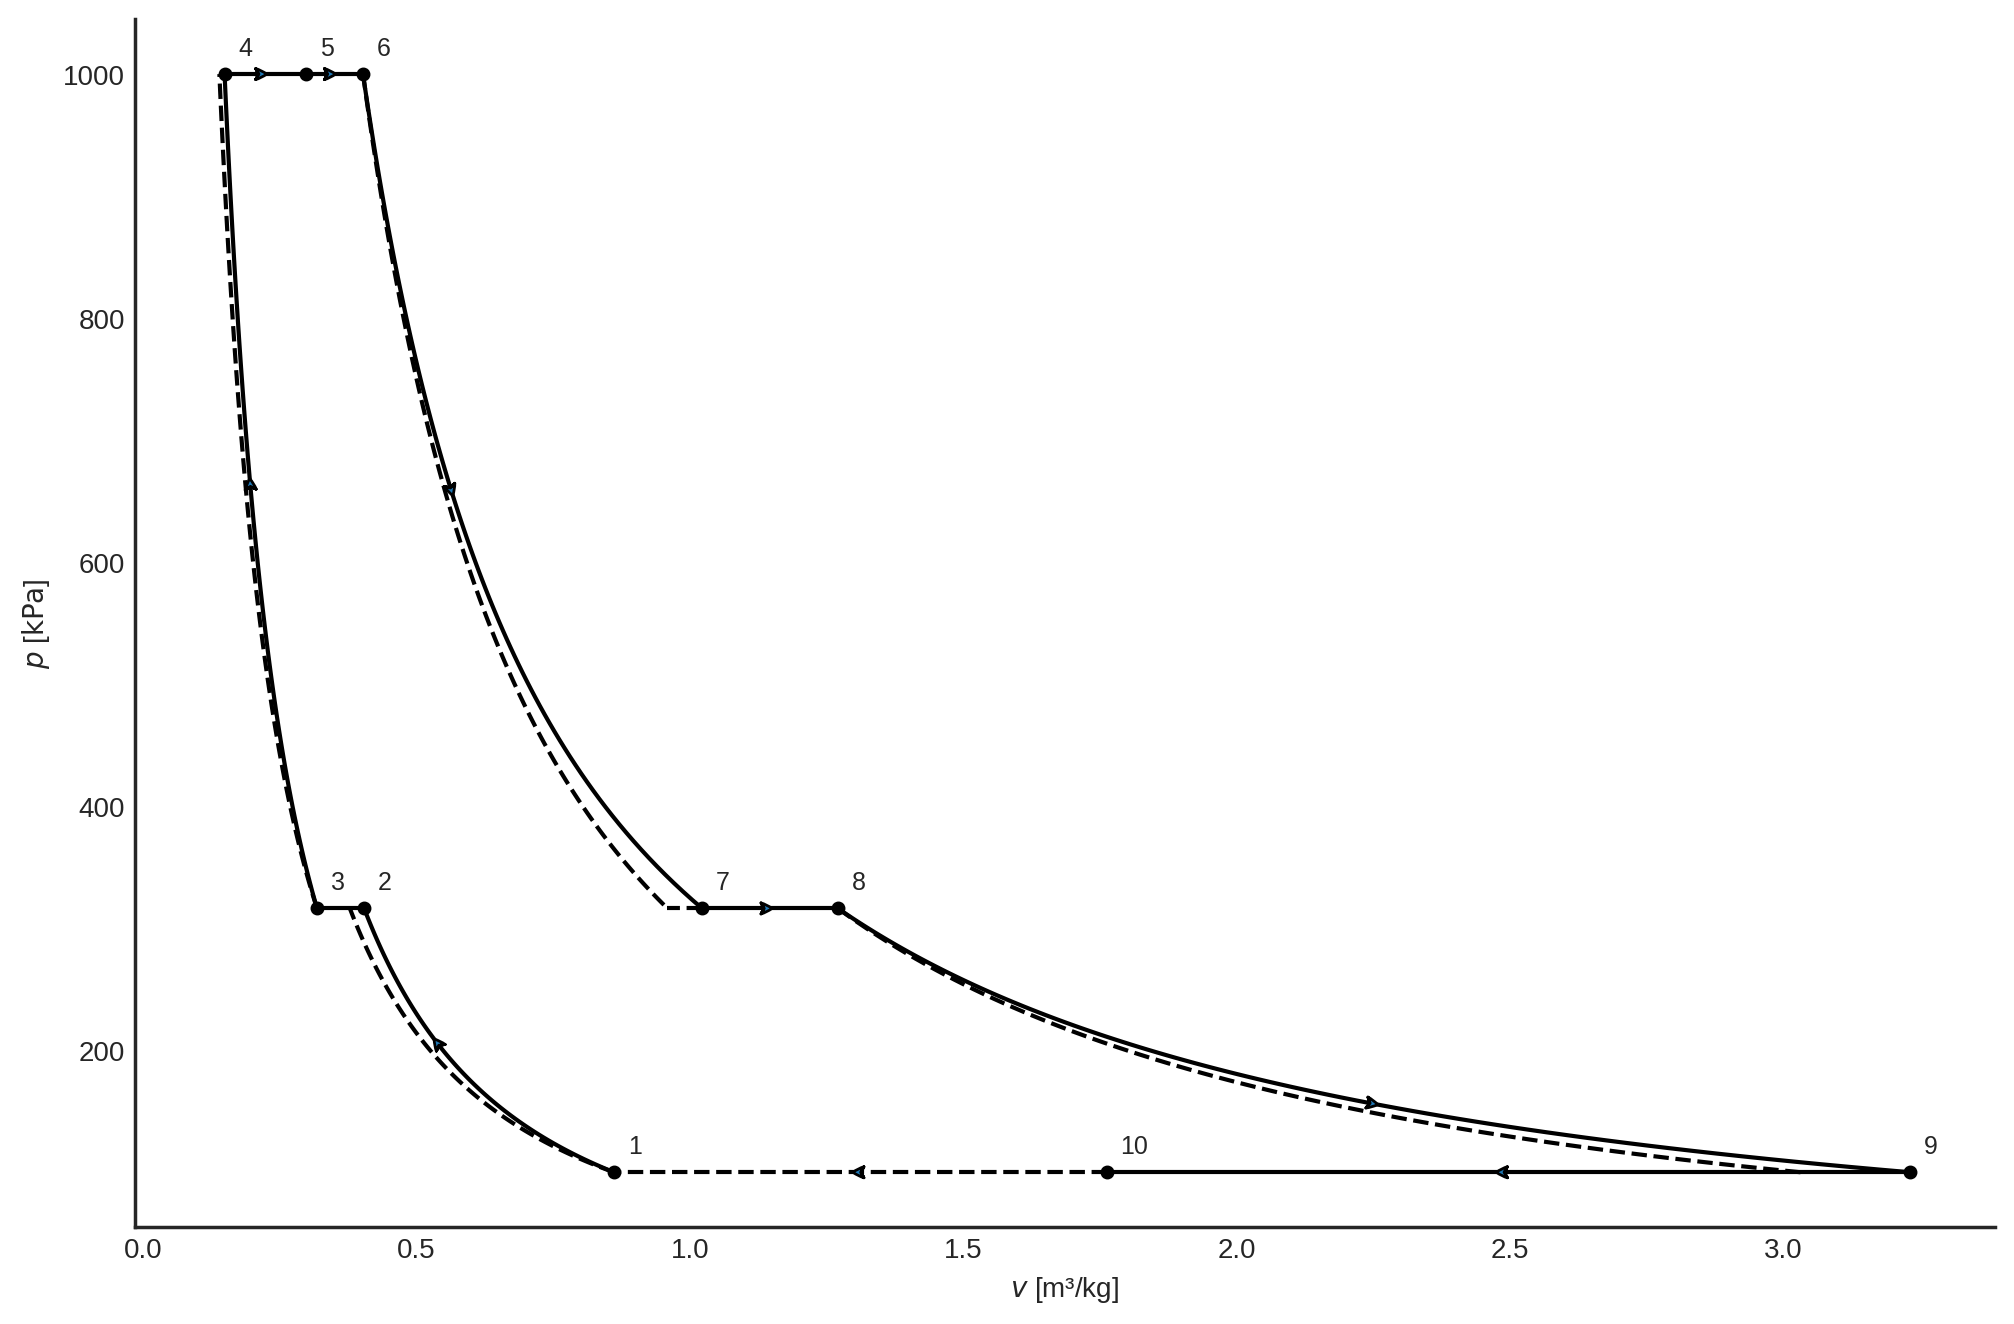

In [12]:
pv = air.pv_diagram()

# plot each state on the p,v diagram
for i in [1,2,3,4,5,6,7,8,9,10]:
    pv.plot_state(states[i],label_loc='north east')


# plot the process paths
pv.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[1],states[2],path='isentropic efficiency')
pv.plot_process(states[2],states[3],path='isobaric',arrow=False)
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='isobaric')
pv.plot_process(states[6],states['7s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[7],states['7s'],path='isobaric',linestyle='dashed',arrow=False)
pv.plot_process(states[6],states[7],path='nonideal')
pv.plot_process(states[7],states[8],path='isobaric')
pv.plot_process(states[8],states['9s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[8],states[9],path='nonideal')
pv.plot_process(states[9],states[10],path='isobaric')
pv.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');

##### Log-Log Scale

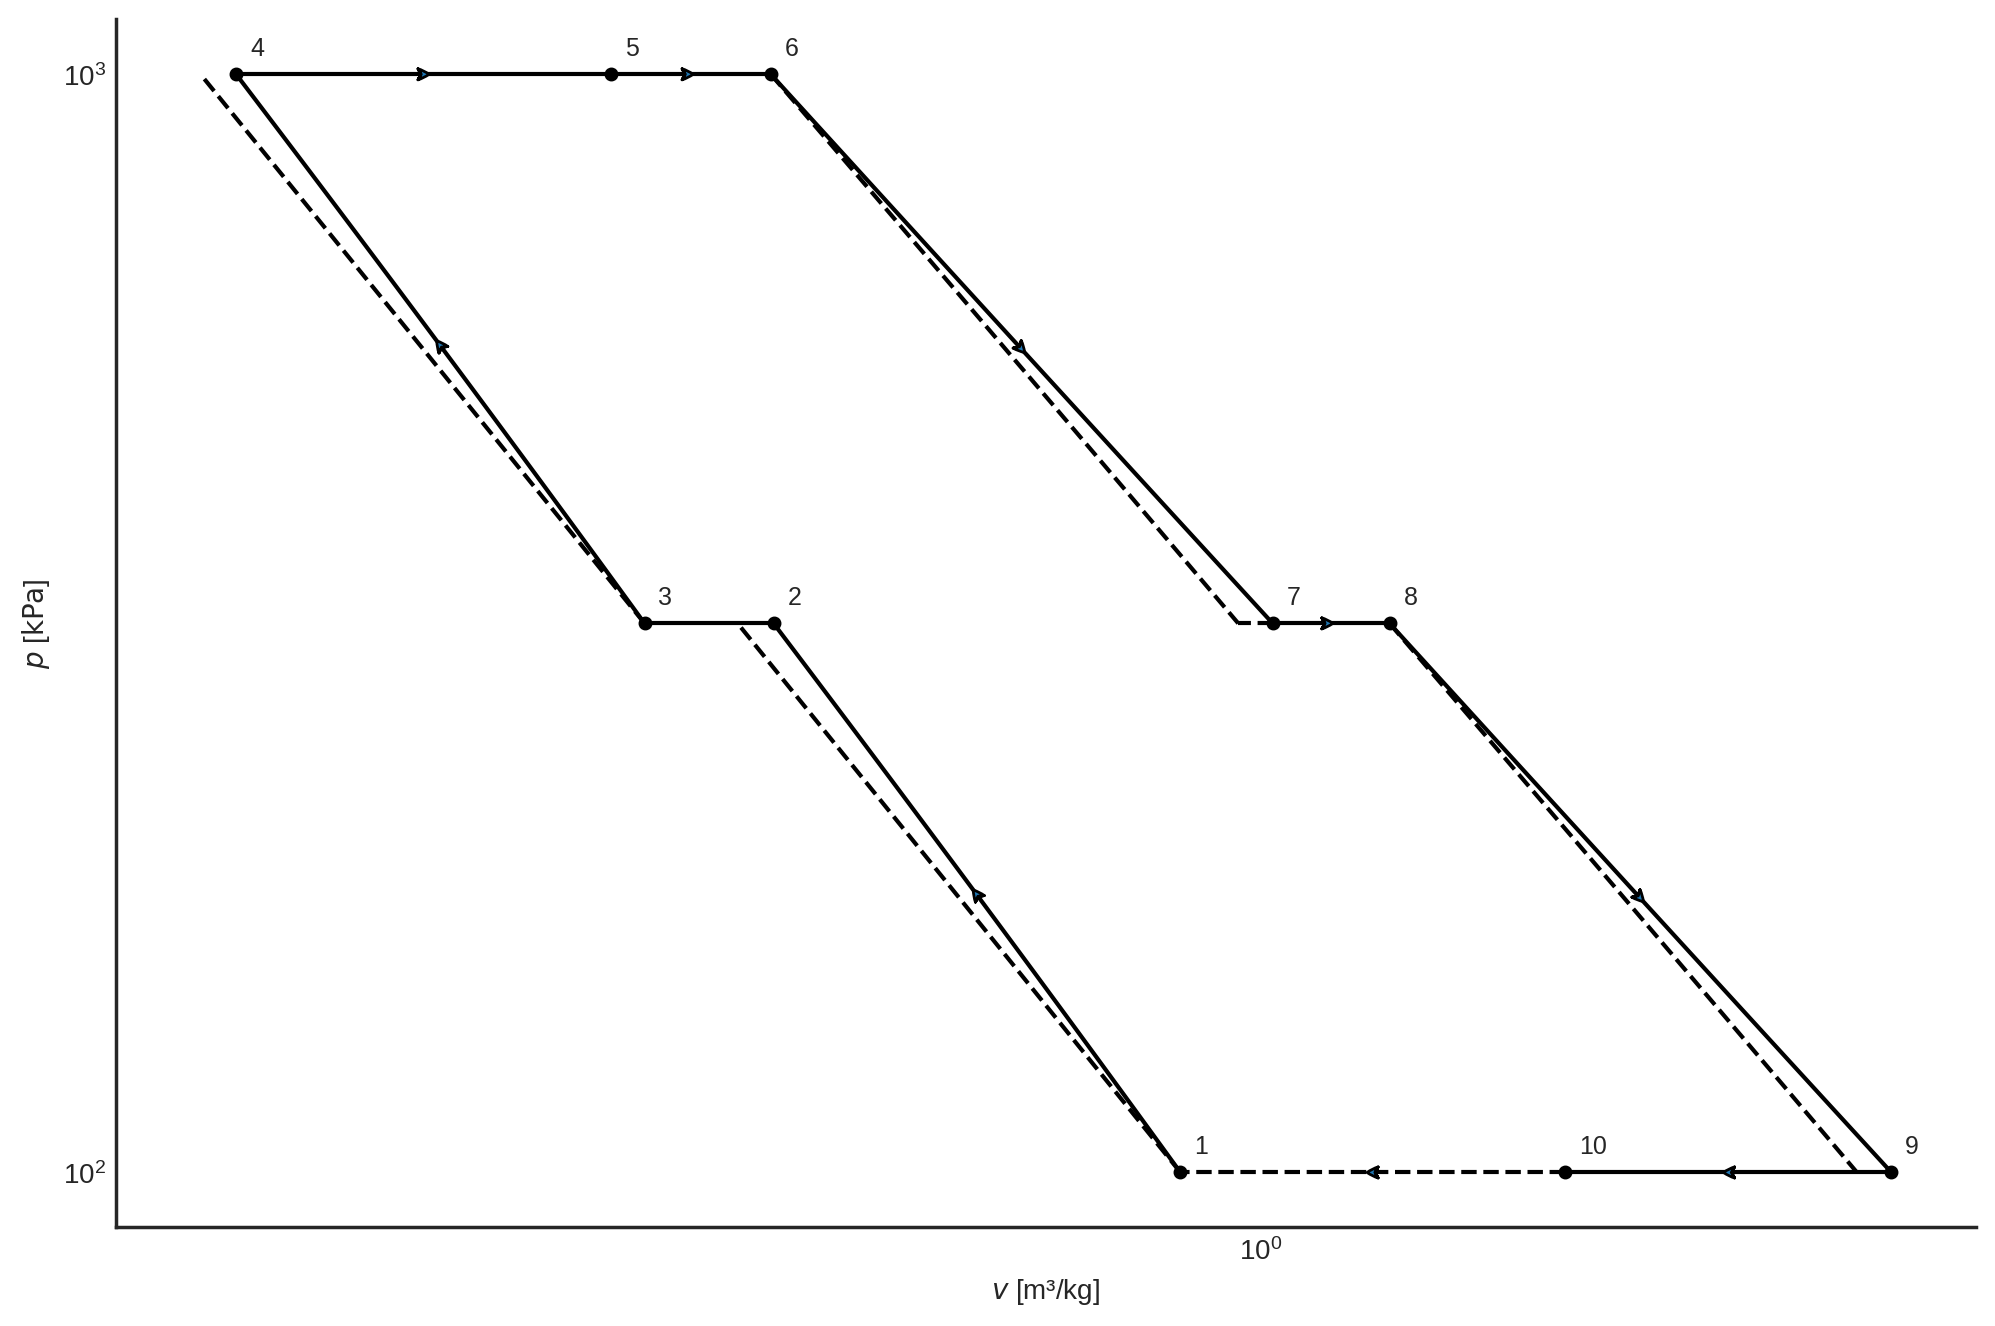

In [13]:
pv = air.pv_diagram(log_x=True, log_y=True)

# plot each state on the p,v diagram
for i in [1,2,3,4,5,6,7,8,9,10]:
    pv.plot_state(states[i],label_loc='north east')


# plot the process paths
pv.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[1],states[2],path='isentropic efficiency')
pv.plot_process(states[2],states[3],path='isobaric',arrow=False)
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='isobaric')
pv.plot_process(states[6],states['7s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[7],states['7s'],path='isobaric',linestyle='dashed',arrow=False)
pv.plot_process(states[6],states[7],path='nonideal')
pv.plot_process(states[7],states[8],path='isobaric')
pv.plot_process(states[8],states['9s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[8],states[9],path='nonideal')
pv.plot_process(states[9],states[10],path='isobaric')
pv.plot_process(states[10],states[1],path='isobaric',linestyle='dashed');

#### $T$-$s$ diagram

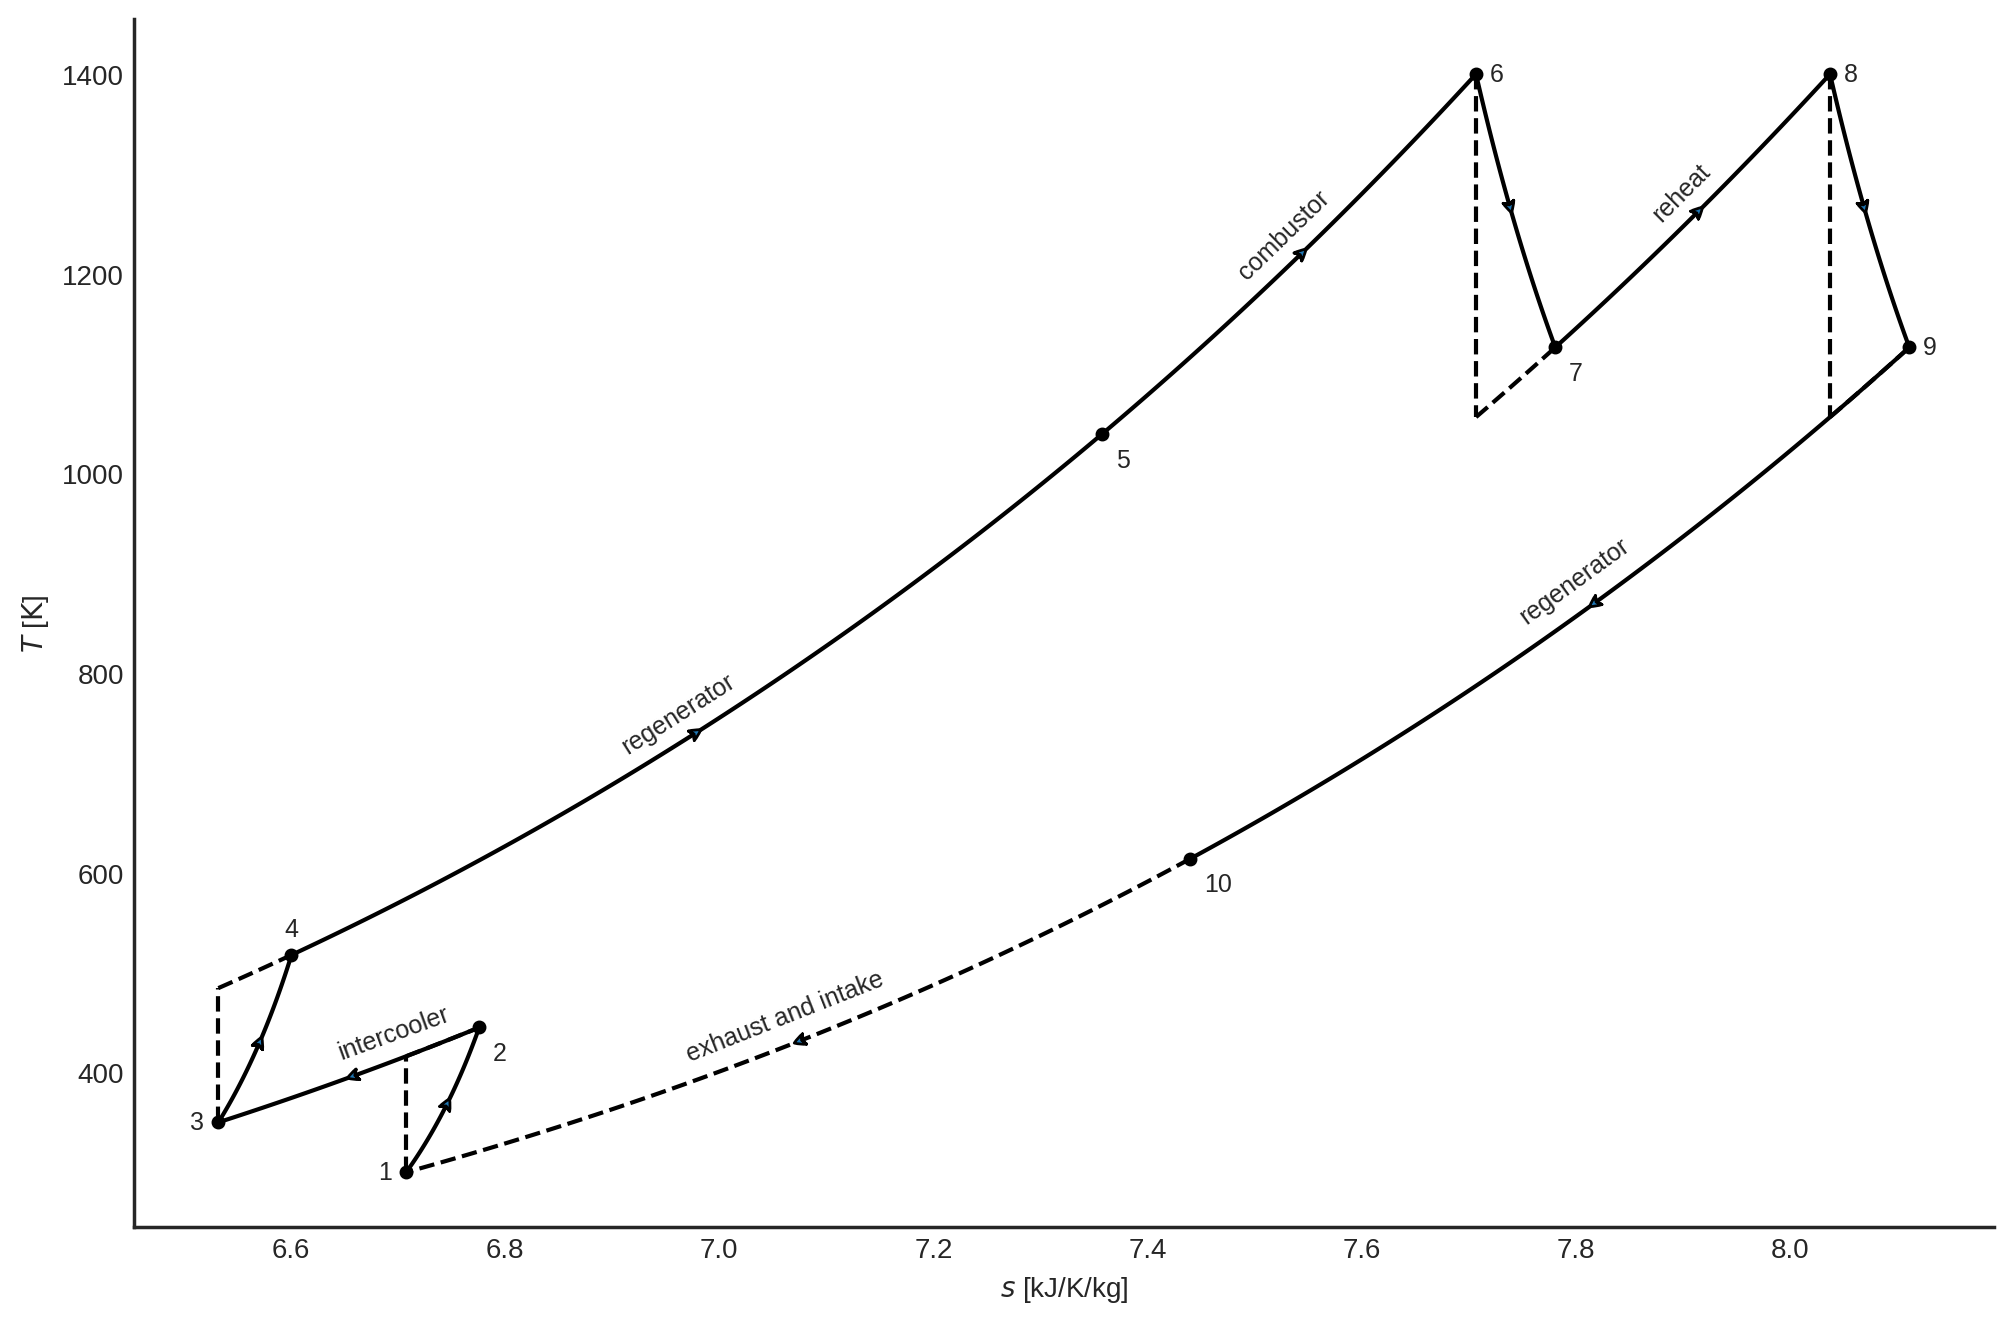

In [14]:
Ts = air.Ts_diagram()

# plot each state on the p,v diagram
for i in [1,3]:
    Ts.plot_state(states[i],label_loc='west')
Ts.plot_state(states[4])
for i in [6,8,9]:
    Ts.plot_state(states[i],label_loc='east')
for i in [2,5,7,10]:
    Ts.plot_state(states[i],label_loc='south east')
    
# plot the process paths
Ts.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[1],states[2],path='nonideal')
Ts.plot_process(states['2s'],states[2],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='intercooler',labelprops=dict(ha='left'))
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[3],states[4],path='nonideal')
Ts.plot_process(states['4s'],states[4],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[4],states[5],path='isobaric',label='regenerator')
Ts.plot_process(states[5],states[6],path='isobaric',label='combustor')
Ts.plot_process(states[6],states['7s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[6],states[7],path='nonideal')
Ts.plot_process(states['7s'],states[7],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[7],states[8],path='isobaric',label='reheat')
Ts.plot_process(states[8],states['9s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[8],states[9],path='nonideal');
Ts.plot_process(states['9s'],states[9],path='isobaric',linestyle='dashed',arrow=False)
Ts.plot_process(states[9],states[10],path='isobaric',label='regenerator');
Ts.plot_process(states[10],states[1],path='isobaric',label='exhaust and intake',linestyle='dashed');

In [17]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

!jupyter nbconvert --to html_embed --no-input --no-prompt "Ex9.5 Modified Brayton Cycle (Air-Standard).ipynb"

[NbConvertApp] Converting notebook Ex9.5 Modified Brayton Cycle (Air-Standard).ipynb to html_embed


[NbConvertApp] Writing 1121465 bytes to Ex9.5 Modified Brayton Cycle (Air-Standard).html
